In [1]:
#Supervised Learning-1 ; Labelencoder ; LogisticRegression

In [2]:
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline

In [3]:
voice = pd.read_csv("F:\sreenu\Data Science\Python\Module-7 Dataset/voice.csv")

In [4]:
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
voice.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [6]:
#1.We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”,identify the 
#target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside 
#for testing.

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
from sklearn.model_selection import train_test_split
X,y = voice.iloc[:,:-1].values, voice.iloc[:,-1].values

In [9]:
X

array([[0.05978098, 0.06424127, 0.03202691, ..., 0.0078125 , 0.        ,
        0.        ],
       [0.06600874, 0.06731003, 0.04022873, ..., 0.0546875 , 0.046875  ,
        0.05263158],
       [0.0773155 , 0.08382942, 0.03671846, ..., 0.015625  , 0.0078125 ,
        0.04651163],
       ...,
       [0.14205626, 0.09579843, 0.18373124, ..., 2.9375    , 2.9296875 ,
        0.19475862],
       [0.14365874, 0.09062826, 0.18497617, ..., 3.59375   , 3.5859375 ,
        0.31100218],
       [0.16550895, 0.09288354, 0.18304392, ..., 0.5546875 , 0.546875  ,
        0.35      ]])

In [10]:
y

array(['male', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [12]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
#2. Fit a logistic regression model and measure the accuracy on the test set.

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_predict = lr.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
print(accuracy_score(y_predict,y_test))

0.8974763406940063


In [18]:
#3. Compute the correlation matrix that describes the dependence between all predictors and identify the 
# predictors that are highly correlated.  Plot the correlation matrix using seaborn heatmap.

In [19]:
corr_matrix = voice.corr()
print(corr_matrix)

          meanfreq        sd    median       Q25       Q75       IQR  \
meanfreq  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
sd       -0.739039  1.000000 -0.562603 -0.846931 -0.161076  0.874660   
median    0.925445 -0.562603  1.000000  0.774922  0.731849 -0.477352   
Q25       0.911416 -0.846931  0.774922  1.000000  0.477140 -0.874189   
Q75       0.740997 -0.161076  0.731849  0.477140  1.000000  0.009636   
IQR      -0.627605  0.874660 -0.477352 -0.874189  0.009636  1.000000   
skew     -0.322327  0.314597 -0.257407 -0.319475 -0.206339  0.249497   
kurt     -0.316036  0.346241 -0.243382 -0.350182 -0.148881  0.316185   
sp.ent   -0.601203  0.716620 -0.502005 -0.648126 -0.174905  0.640813   
sfm      -0.784332  0.838086 -0.661690 -0.766875 -0.378198  0.663601   
mode      0.687715 -0.529150  0.677433  0.591277  0.486857 -0.403764   
centroid  1.000000 -0.739039  0.925445  0.911416  0.740997 -0.627605   
meanfun   0.460844 -0.466281  0.414909  0.545035  0.155091 -0.53

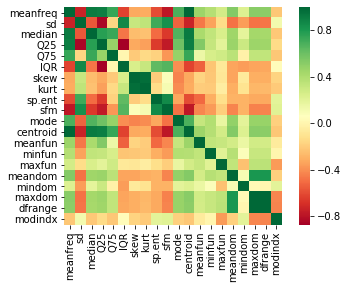

In [20]:
import seaborn as sns
sns.heatmap(corr_matrix,square=True,cmap=plot.cm.RdYlGn)
plot.yticks(rotation=0)
plot.xticks(rotation=90)
plot.show()

In [21]:
#4. Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare 
# the accuracy with that of previous model.

In [22]:
X,y = voice.iloc[:,[1,3,4,5,7,8,9,10,12,13,14,15,16,18]].values, voice.iloc[:,-1].values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [23]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_predict = lr.predict(X_test)

In [25]:
print(accuracy_score(y_predict,y_test))

0.9053627760252366
